1. PCA on 3D dataset

Generate a dataset simulating 3 features, each with N entries (N being 
). Each feature is made by random numbers generated according the normal distribution 
 with mean 
 and standard deviation 
, with 
. Generate the 3 variables 
 such that:
 is distributed as 
 is distributed as 
 is given by 
Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
Redefine the data according to the new basis from the PCA
Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the , and projections) of scatter plots.

Eigenvalues Covariance:
[ 2.78421133e+01+0.j  2.04059717e+00+0.j -1.18327532e-15+0.j]
Eigenvectors Covariance:
[[-0.12063528  0.56460647 -0.81649658]
 [-0.57086359 -0.71235391 -0.40824829]
 [-0.81213416  0.41685902  0.40824829]]

Eigenvalues SVD:
[2.78576336e+01 2.04075858e+00 4.19129833e-30]
Eigenvectors SVD:
[[-0.12060066  0.56461386 -0.81649658]
 [-0.57090727 -0.7123189  -0.40824829]
 [-0.81210859  0.41690883  0.40824829]]

The  dataset variability is: 100.0%
[[ -6.71129718 -10.75061734  -3.28573595 ...  -0.03763872  -4.05534291
    1.6809634 ]
 [  0.58346528   0.52561422   0.03876567 ...   0.60310656  -0.88601143
    2.09711733]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


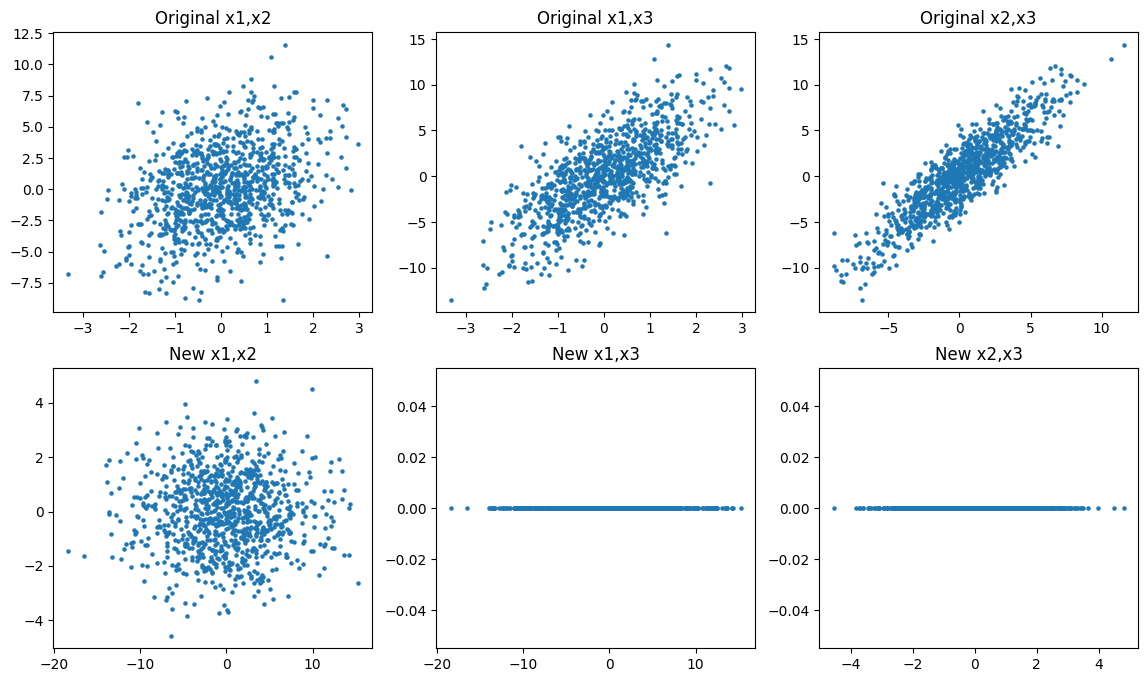

In [2]:
import numpy as np
from scipy import linalg as sla
import matplotlib.pyplot as plt

N=1000
x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = x1 + np.random.normal(loc=0, scale=3, size=N)
x3 = 2*x1 +x2
data = np.vstack((x1,x2,x3))

m_cov = np.cov(data)
egval_cov, egvec_cov = sla.eig(m_cov)
indx = egval_cov.argsort()[::-1]
egval_cov = egval_cov[indx]
egvec_cov = egvec_cov[:,indx]

U, S, V = sla.svd(data) 

egval_svd = S**2/(N-1)
i = egval_svd .argsort()[::-1]
egval_svd  = egval_svd [i]

egvec_svd = U
egvec_svd= egvec_svd[:,i]

print(f"Eigenvalues Covariance:\n{egval_cov}")
print(f"Eigenvectors Covariance:\n{egvec_cov }")
print(f"\nEigenvalues SVD:\n{egval_svd }")
print(f"Eigenvectors SVD:\n{egvec_svd}")




var = np.real(np.sum(egval_cov[:2])/np.sum(egval_cov))*100
print(f"\nThe  dataset variability is: {var}%")


eigenvecs_cov_pca = egvec_cov[:,:2]
data_pca = np.dot(eigenvecs_cov_pca.T, data)
data_pca = np.vstack([data_pca, np.zeros((1, N))]) 
print(data_pca)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(data[0], data[1], s= 5)
ax01.set_title('Original x1,x2')
ax02.scatter(data[0], data[2], s= 5)
ax02.set_title('Original x1,x3')
ax03.scatter(data[1], data[2], s= 5)
ax03.set_title('Original x2,x3')

ax11.scatter(data_pca[0], data_pca[1], s= 5)
ax11.set_title('New x1,x2')
ax12.scatter(data_pca[0], data_pca[2], s= 5)
ax12.set_title('New x1,x3')
ax13.scatter(data_pca[1], data_pca[2], s= 5)
ax13.set_title('New x2,x3')

plt.show()

2. PCA on a nD dataset

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the 
 and 
. Repeat the PCA procedure and compare the results with what you have obtained before.

In [10]:

noise=[]
for i in range(10):
    noise.append(np.random.normal(loc=0, scale=1/20, size=N))

ndata = np.vstack([data, noise[0], noise[1], noise[2], noise[3], noise[4], noise[5], noise[6], noise[7], noise[8], noise[9]])

matrcovn = np.cov(ndata)
n_egnvals_cov, eigen_vecs_covN = np.linalg.eig(matrcovn)

UN, SN, VN = np.linalg.svd(ndata) 
n_egnvals_svd = SN**2/(N-1)
n_egnvec_svd = UN

print(f"Eigenvalues Covariance with Noise:\n{n_egnvals_cov}")
print(f"Eigenvectors Covariance with Noise:\n{eigen_vecs_covN}")
print(f"\nEigenvalues SVD with Noise:\n{n_egnvals_svd}")
print(f"Eigenvectors SVD with Noise:\n{n_egnvec_svd}")

eigen_vecs_cov_pcaN = eigen_vecs_covN[:,:2]
ndata_pca = np.dot(eigen_vecs_cov_pcaN.T, ndata)
ndata_pca = np.vstack([ndata_pca, np.zeros((1, N))]) 
print(ndata_pca)

Eigenvalues Covariance with Noise:
[ 2.78421208e+01  2.04062309e+00 -4.85864070e-16  2.14268924e-03
  2.87562765e-03  2.81253551e-03  2.72914766e-03  2.60852684e-03
  2.56136562e-03  2.26158986e-03  2.41295951e-03  2.31453241e-03
  2.35686291e-03]
Eigenvectors Covariance with Noise:
[[-1.20635255e-01 -5.64602911e-01 -8.16496581e-01 -8.68785819e-04
  -6.48995226e-04  1.18078485e-03  1.74335194e-04  5.04206085e-04
   7.12020603e-04  5.61390577e-04  5.81528329e-04  5.83976017e-05
  -4.99826578e-05]
 [-5.70863529e-01  7.12349213e-01 -4.08248290e-01  1.06340364e-03
   7.41218251e-04 -1.58456345e-03  1.43649533e-05 -7.56547607e-04
  -8.73007161e-04 -8.68555876e-04 -6.53009766e-04 -2.24126865e-04
   8.31006684e-05]
 [-8.12134038e-01 -4.16856610e-01  4.08248290e-01 -6.74167994e-04
  -5.56772200e-04  7.77006246e-04  3.63035341e-04  2.51864563e-04
   5.51034044e-04  2.54225277e-04  5.10046892e-04 -1.07331661e-04
  -1.68646471e-05]
 [ 2.57076189e-05 -9.05839332e-04  4.01742344e-16  4.87317213e-01

3. Optional: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

Eigenvalues Covariance:
[6.57940709e+03+0.j 3.85406143e+03+0.j 2.01648128e+03+0.j
 1.32681867e+03+0.j 6.10218593e+02+0.j 4.33618554e+02+0.j
 1.17335954e+02+0.j 8.64007193e-02+0.j 1.07368268e-02+0.j
 3.85330787e-04+0.j]
Eigenvectors Covariance:
[[-3.27831566e-01 -1.34391257e-01  6.54919335e-02  8.63984924e-01
   9.45486785e-02 -1.98590747e-02  3.38166047e-01  3.99908190e-03
  -4.54855335e-04  4.57009104e-05]
 [-1.13818908e-01 -5.38781071e-02 -1.90004002e-02  3.19763260e-01
  -1.97550122e-02  2.32607173e-02 -9.38308008e-01  1.33846960e-02
   6.74914234e-04 -5.73082482e-05]
 [-3.06095229e-03  6.59527755e-04  1.05914677e-03  6.93020544e-03
   2.65186570e-03  1.33537798e-04 -1.08822564e-02 -9.27766268e-01
  -3.72227209e-01  2.26325035e-02]
 [ 9.27207133e-04 -2.58262608e-04 -5.10330302e-04 -2.60551065e-03
  -1.53901245e-03 -3.47117394e-05  3.06281191e-03  3.22018741e-01
  -7.69225390e-01  5.51884502e-01]
 [ 5.21959171e-04 -1.52747029e-04 -2.94589142e-04 -1.51272408e-03
  -9.19355464e-04 -2.2

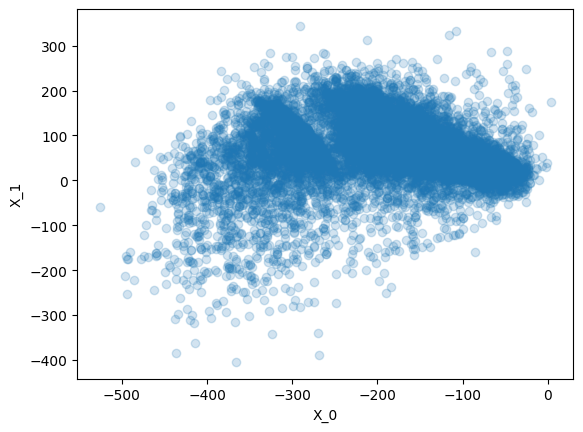

In [11]:
import csv
import pandas as pd

datas = pd.read_csv("data/magic04.data")
datas=datas.drop(['g'], axis=1)
datas = datas.T

covmatr = np.cov(datas)
egnval_cov, egnvecs_cov = sla.eig(covmatr)
index = egnval_cov.argsort()[::-1]
egnval_cov = egnval_cov[index]
egnvecs_cov = egnvecs_cov[:,index]

print(f"Eigenvalues Covariance:\n{egnval_cov}")
print(f"Eigenvectors Covariance:\n{egnvecs_cov}")

var = np.real(np.sum(egnval_cov[:2])/np.sum(egnval_cov))*100
print(f"\nThe percentual of dataset variability is: {var}%")
egnvecs_cov_pca = egnvecs_cov[:,:2]
data_pca = np.dot(egnvecs_cov_pca.T, datas) 
plt.figure()
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.scatter(data_pca[0,:], data_pca[1,:], alpha = 0.2)
plt.show()